In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from digen import Benchmark
benchmark=Benchmark()

# Exploring DIGEN

First, check the overall performance and ranking of the methods across all DIGEN datasets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, ''),
 Text(0, 6.0, ''),
 Text(0, 7.0, ''),
 Text(0, 8.0, ''),
 Text(0, 9.0, '')]

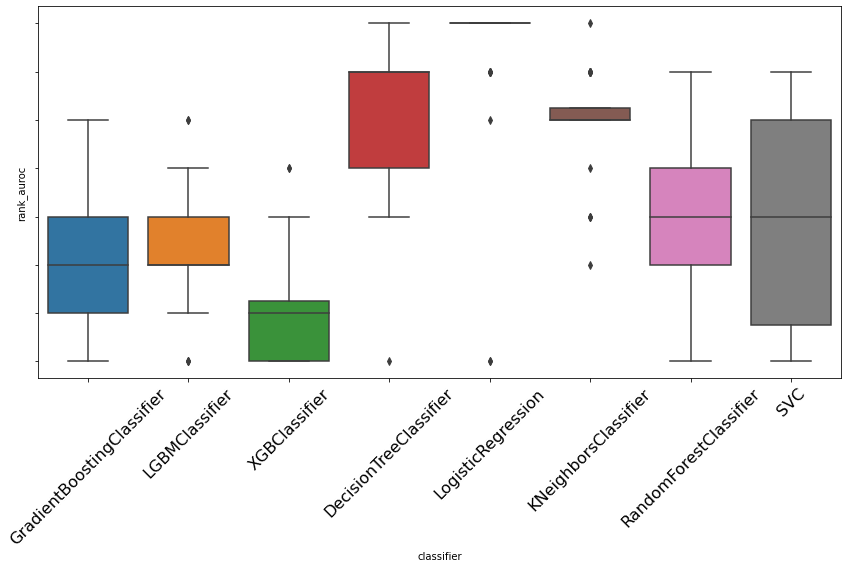

In [3]:
df=benchmark.data[['classifier','dataset','rank_auroc']]
fig,ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(data=df, x='classifier', y='rank_auroc', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

In [4]:
df.groupby(['classifier']).mean()

,rank_auroc
classifier,
DecisionTreeClassifier,6.425
GradientBoostingClassifier,2.850
KNeighborsClassifier,6.025
LGBMClassifier,3.300
LogisticRegression,7.450
RandomForestClassifier,3.775
SVC,3.825
XGBClassifier,2.025


Now let's take a look at the datasets and the performance of the methods using a heatmap and parallel coordinate plots.

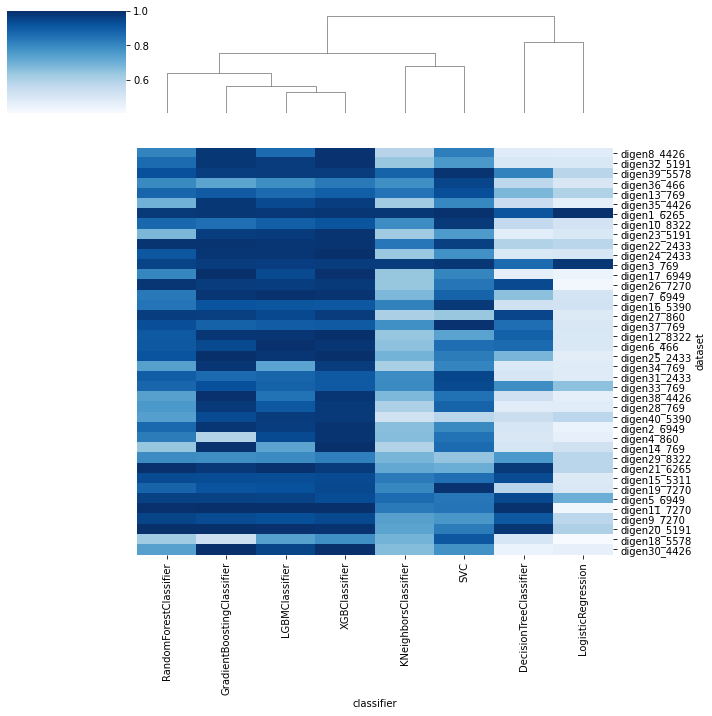

In [5]:
fig, ax=benchmark.plot_heatmap()

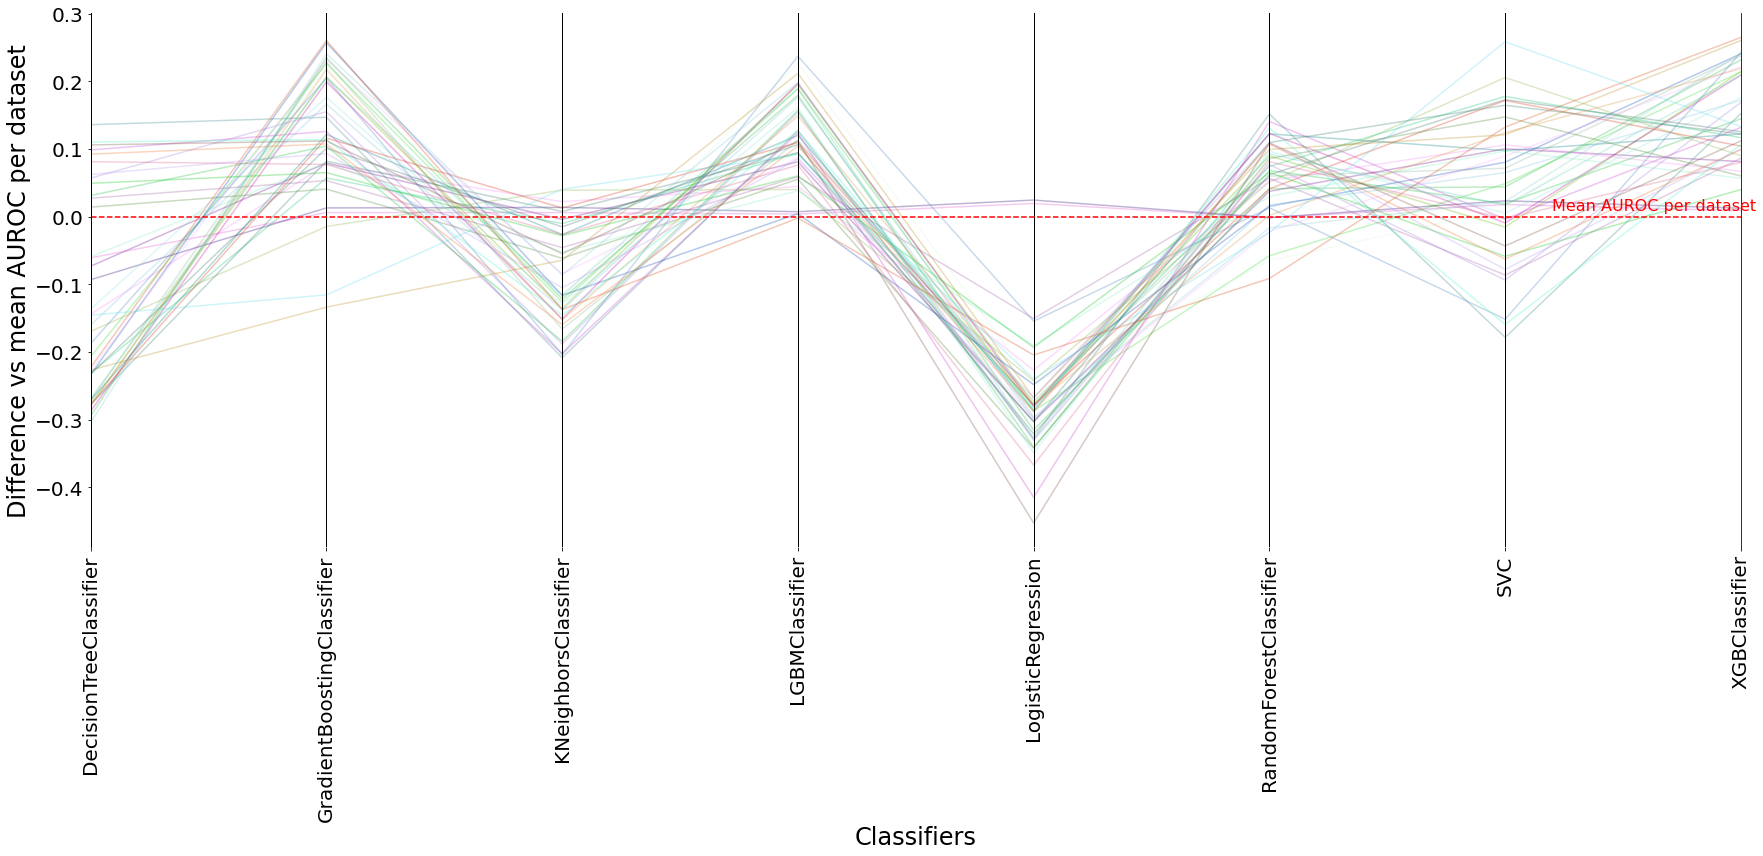

In [6]:
fig, ax=benchmark.plot_parallel_coordinates()

We can further investigate interesting dataset(s) by subsetting them using a single dataset or a list of datasets. 

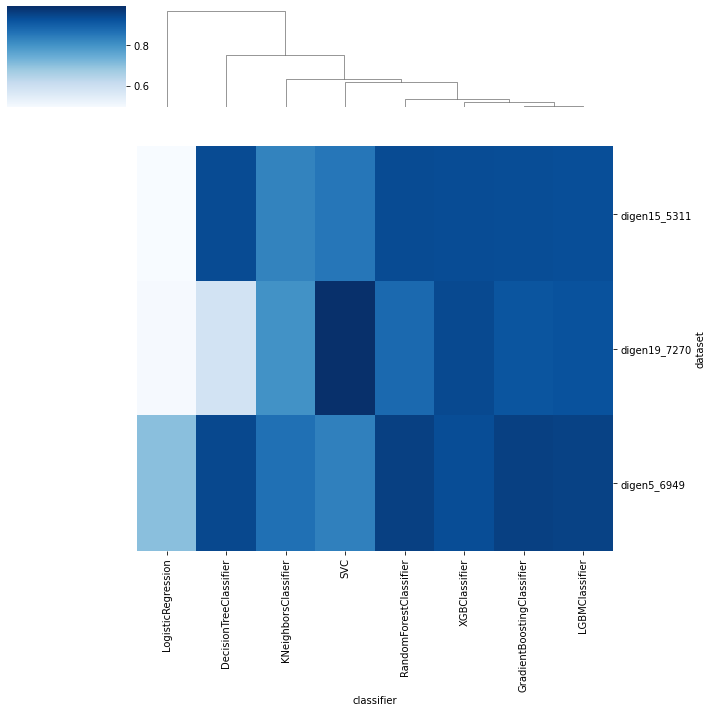

In [7]:
fig, ax=benchmark.plot_heatmap(datasets=['digen15_5311','digen19_7270','digen5_6949'])

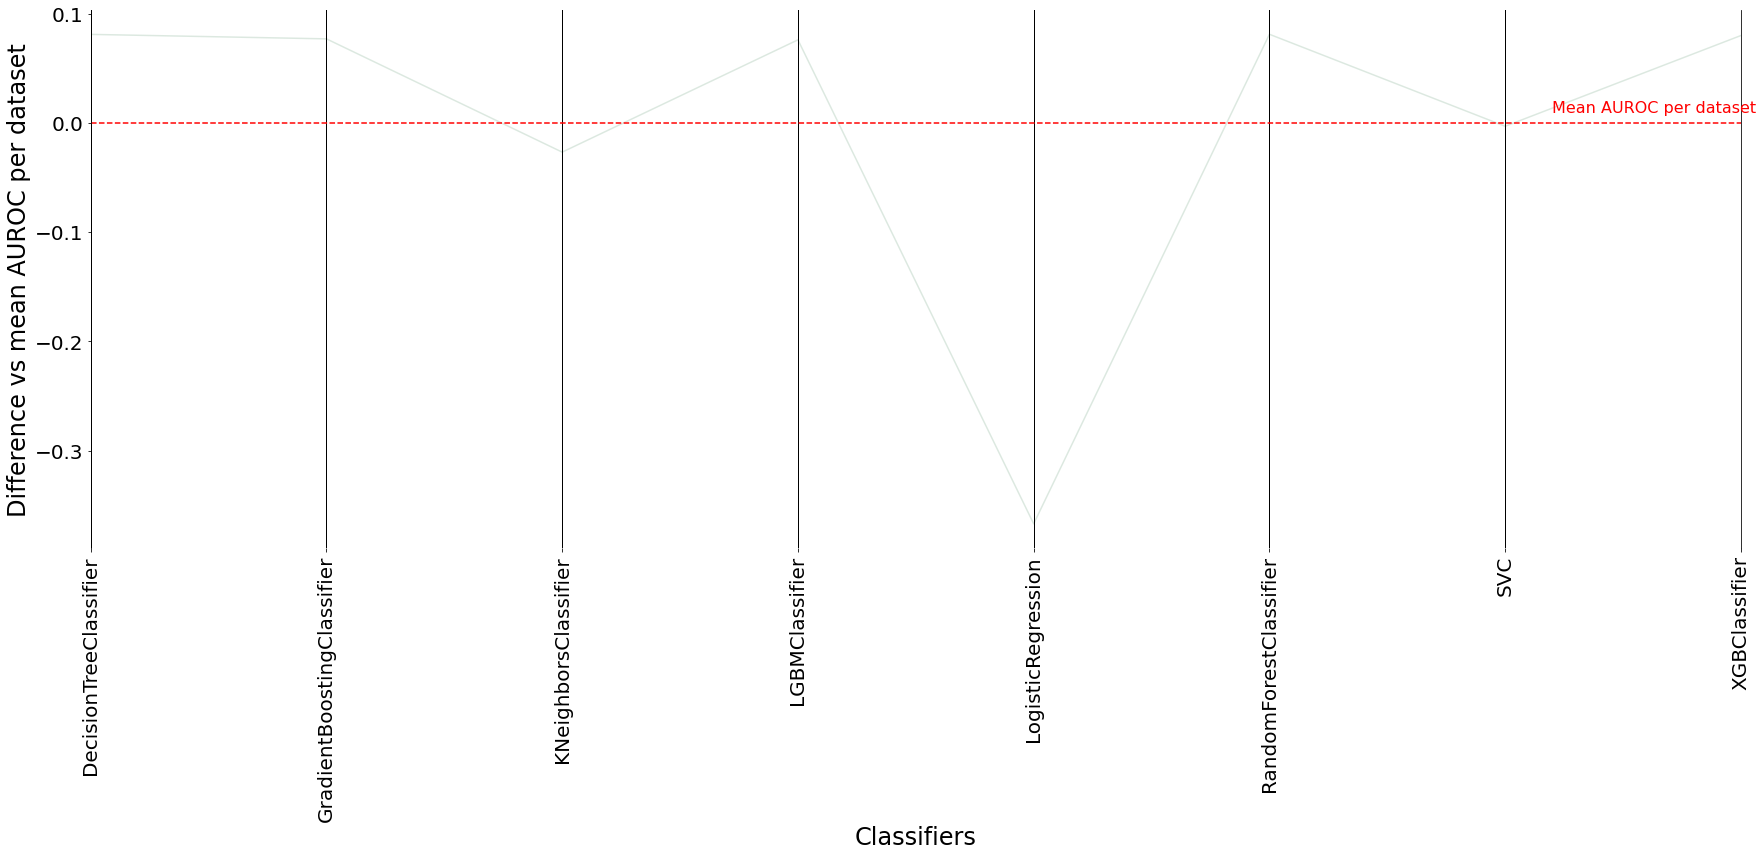

In [8]:
fig, ax=benchmark.plot_parallel_coordinates(datasets='digen15_5311')

Modifying the chart using Matplotlib API

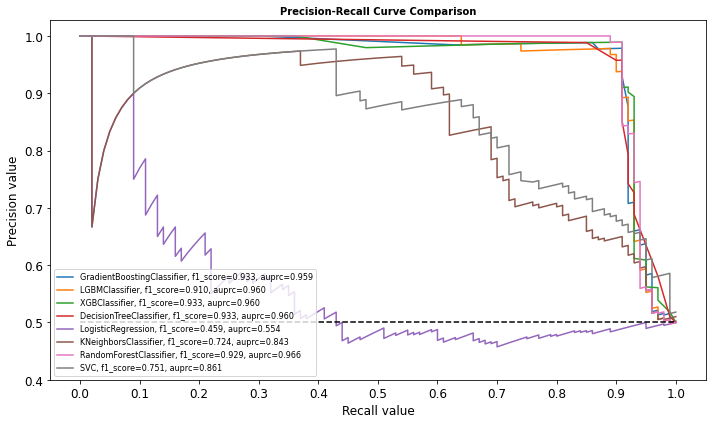

In [9]:
fig,ax=benchmark.plot_prc(dataset_name='digen15_5311')
fig.set_size_inches(10,6)
ax.title.set_size(10)
ax.set_xlabel("Recall value", fontsize=12)
ax.set_ylabel("Precision value", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(prop={'size':8}, loc='lower left')


# Extracting trials

In [14]:
import re
models=benchmark.list_models()
parsed=list(map(lambda x : re.sub('X[0-9]+','attr', re.sub('[0-9]+.[0-9]+','const',models[x]))
                                 , models))

In [15]:
counts=pd.DataFrame(list(map(lambda x : dict(Counter(list(filter(None, x.replace('(',' ').replace(')',' ').replace(',',' ').replace('.','X').split(' '))))), parsed))).fillna(0)


In [16]:
from collections import Counter
import io
import re
models=benchmark.list_models()
#counting how many times a given operator was used in the given dataset
counts=counts.to_numpy()
dist=np.zeros([len(counts),len(counts)])
#calculating distance between datasets based on Jaccard index
for i,x in enumerate(counts):
    for j,y in enumerate(counts):
        dist[i,j]=np.sum(np.minimum(x,y))/np.sum(np.maximum(x,y))
dist=pd.DataFrame(dist, index=list(models.keys()))
dist.columns=list(models.keys())
dist

,digen8_4426,digen32_5191,digen39_5578,digen36_466,digen13_769,digen35_4426,digen1_6265,digen10_8322,digen23_5191,digen22_2433,...,digen29_8322,digen21_6265,digen15_5311,digen19_7270,digen5_6949,digen11_7270,digen9_7270,digen20_5191,digen18_5578,digen30_4426
digen8_4426,1.000000,0.500000,0.500000,0.333333,0.161290,0.285714,0.400000,0.333333,0.555556,0.500000,...,0.181818,0.384615,0.200000,0.333333,0.384615,0.714286,0.250000,0.666667,0.714286,0.400000
digen32_5191,0.500000,1.000000,0.750000,0.400000,0.225806,0.250000,0.333333,0.384615,0.454545,0.400000,...,0.217391,0.538462,0.333333,0.384615,0.428571,0.400000,0.222222,0.333333,0.555556,0.600000
digen39_5578,0.500000,0.750000,1.000000,0.555556,0.187500,0.333333,0.454545,0.500000,0.454545,0.400000,...,0.166667,0.428571,0.333333,0.285714,0.428571,0.400000,0.222222,0.333333,0.555556,0.600000
digen36_466,0.333333,0.400000,0.555556,1.000000,0.151515,0.333333,0.454545,0.500000,0.333333,0.400000,...,0.217391,0.250000,0.428571,0.285714,0.428571,0.272727,0.375000,0.500000,0.400000,0.333333
digen13_769,0.161290,0.225806,0.187500,0.151515,1.000000,0.294118,0.212121,0.235294,0.290323,0.225806,...,0.368421,0.333333,0.257143,0.312500,0.257143,0.225806,0.393939,0.161290,0.225806,0.290323
digen35_4426,0.285714,0.250000,0.333333,0.333333,0.294118,1.000000,0.571429,0.411765,0.466667,0.333333,...,0.307692,0.444444,0.444444,0.500000,0.529412,0.333333,0.400000,0.285714,0.333333,0.375000
digen1_6265,0.400000,0.333333,0.454545,0.454545,0.212121,0.571429,1.000000,0.428571,0.384615,0.454545,...,0.250000,0.466667,0.375000,0.538462,0.466667,0.454545,0.411765,0.400000,0.454545,0.500000
digen10_8322,0.333333,0.384615,0.500000,0.500000,0.235294,0.411765,0.428571,1.000000,0.428571,0.384615,...,0.280000,0.333333,0.500000,0.375000,0.600000,0.384615,0.300000,0.230769,0.384615,0.428571
digen23_5191,0.555556,0.454545,0.454545,0.333333,0.290323,0.466667,0.384615,0.428571,1.000000,0.600000,...,0.304348,0.375000,0.375000,0.428571,0.466667,0.454545,0.411765,0.400000,0.600000,0.384615
digen22_2433,0.500000,0.400000,0.400000,0.400000,0.225806,0.333333,0.454545,0.384615,0.600000,1.000000,...,0.272727,0.333333,0.333333,0.384615,0.333333,0.400000,0.294118,0.500000,0.555556,0.333333


Plotting similarity between digen datasets based on using similar nodes

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


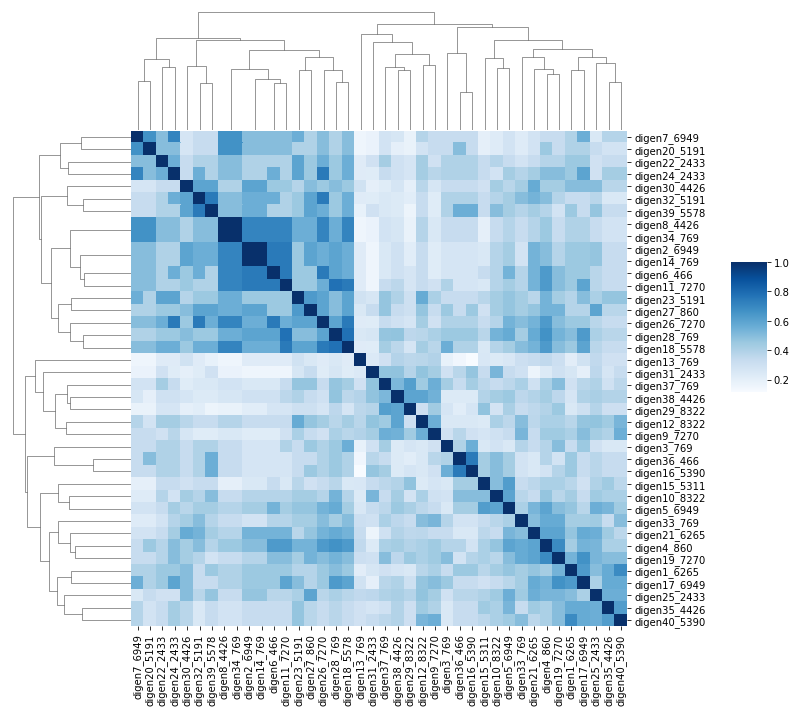

In [17]:
g=sns.clustermap(dist, cmap="Blues")#                linewidths=.75, figsize=(16, 16))
col=g.cax.get_position()
g.cax.set_position([col.x0+1, col.y0-0.35, col.width, col.height])

In [19]:
import itertools
import random
import operator
from deap import gp, tools


def safeDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1


pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 10), float, "X")

pset.addPrimitive(operator.add, [float,float], float)
pset.addPrimitive(operator.sub, [float,float], float)
pset.addPrimitive(operator.mul, [float,float], float)
pset.addPrimitive(safeDiv, [float,float], float)

pset.addPrimitive(operator.eq, [float, float], float)
pset.addPrimitive(operator.ne, [float, float], float)
pset.addPrimitive(operator.ge, [float, float], float)
pset.addPrimitive(operator.gt, [float, float], float)
pset.addPrimitive(operator.le, [float, float], float)
pset.addPrimitive(operator.lt, [float, float], float)

pset.addPrimitive(min, [float,float], float)
pset.addPrimitive(max, [float,float], float)
randval = "rand" + str(random.random())[2:]  # so it can rerun from ipython

#pset.addEphemeralConstant(randval, lambda: random.random() * 100, float)
pset.addTerminal('attr', float)
pset.addTerminal('const', float)


In [20]:
# You may need to install pygraphviz to proceed
# sudo apt install graphviz-dev
from deap import gp, tools

#expr=benchmark.get_models()['digen19_7270']
edgelist=list()

for exprs in parsed:
    gg=gp.PrimitiveTree.from_string(exprs, pset)
    nodes, edges, labels=gp.graph(gg)
    edgelist.append([(labels[x],labels[y]) for (x,y) in edges])

In [21]:
Counter(edgelist[9])

Counter({('le', 'eq'): 1,
         ('eq', 'attr'): 2,
         ('le', 'safeDiv'): 1,
         ('safeDiv', 'attr'): 2})

In [22]:
#this time edges...
counts=pd.DataFrame(list(map(lambda x : dict(Counter(x)), edgelist))).fillna(0)
counts

,"(safeDiv, attr)","(safeDiv, mul)","(mul, attr)","(mul, mul)","(mul, min)","(min, attr)","(lt, mul)","(ne, lt)","(lt, attr)","(ne, gt)",...,"(lt, max)","(lt, min)","(le, const)","(min, ge)","(lt, ne)","(ne, min)","(add, ne)","(add, gt)","(add, sub)","(gt, safeDiv)"
0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
counts=counts.to_numpy()
dist=np.zeros([len(counts),len(counts)])
#calculating distance between datasets based on Jaccard index
for i,x in enumerate(counts):
    for j,y in enumerate(counts):
        dist[i,j]=np.sum(np.minimum(x,y))/np.sum(np.maximum(x,y))
dist=pd.DataFrame(dist, index=list(models.keys()))
dist.columns=list(models.keys())
dist

,digen8_4426,digen32_5191,digen39_5578,digen36_466,digen13_769,digen35_4426,digen1_6265,digen10_8322,digen23_5191,digen22_2433,...,digen29_8322,digen21_6265,digen15_5311,digen19_7270,digen5_6949,digen11_7270,digen9_7270,digen20_5191,digen18_5578,digen30_4426
digen8_4426,1.000000,0.250000,0.250000,0.000000,0.096774,0.066667,0.090909,0.000000,0.333333,0.111111,...,0.043478,0.230769,0.000000,0.000000,0.066667,0.111111,0.058824,0.142857,0.428571,0.200000
digen32_5191,0.250000,1.000000,0.200000,0.000000,0.090909,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.083333,0.200000,0.058824,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.272727
digen39_5578,0.250000,0.200000,1.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.000000,0.125000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.200000,0.400000
digen36_466,0.000000,0.000000,0.000000,1.000000,0.000000,0.058824,0.076923,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000
digen13_769,0.096774,0.090909,0.125000,0.000000,1.000000,0.076923,0.027027,0.000000,0.151515,0.161290,...,0.063830,0.135135,0.024390,0.052632,0.050000,0.161290,0.073171,0.062500,0.125000,0.266667
digen35_4426,0.066667,0.000000,0.000000,0.058824,0.076923,1.000000,0.250000,0.047619,0.111111,0.125000,...,0.066667,0.043478,0.000000,0.100000,0.090909,0.125000,0.181818,0.142857,0.000000,0.000000
digen1_6265,0.090909,0.000000,0.000000,0.076923,0.027027,0.250000,1.000000,0.058824,0.066667,0.076923,...,0.037037,0.000000,0.000000,0.125000,0.111111,0.076923,0.100000,0.090909,0.000000,0.000000
digen10_8322,0.000000,0.000000,0.000000,0.142857,0.000000,0.047619,0.058824,1.000000,0.000000,0.000000,...,0.071429,0.000000,0.000000,0.000000,0.047619,0.000000,0.043478,0.000000,0.000000,0.000000
digen23_5191,0.333333,0.076923,0.076923,0.000000,0.151515,0.111111,0.066667,0.000000,1.000000,0.166667,...,0.076923,0.176471,0.111111,0.000000,0.111111,0.272727,0.047619,0.200000,0.166667,0.066667
digen22_2433,0.111111,0.000000,0.000000,0.000000,0.161290,0.125000,0.076923,0.000000,0.166667,1.000000,...,0.130435,0.000000,0.000000,0.000000,0.058824,0.200000,0.052632,0.250000,0.000000,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """


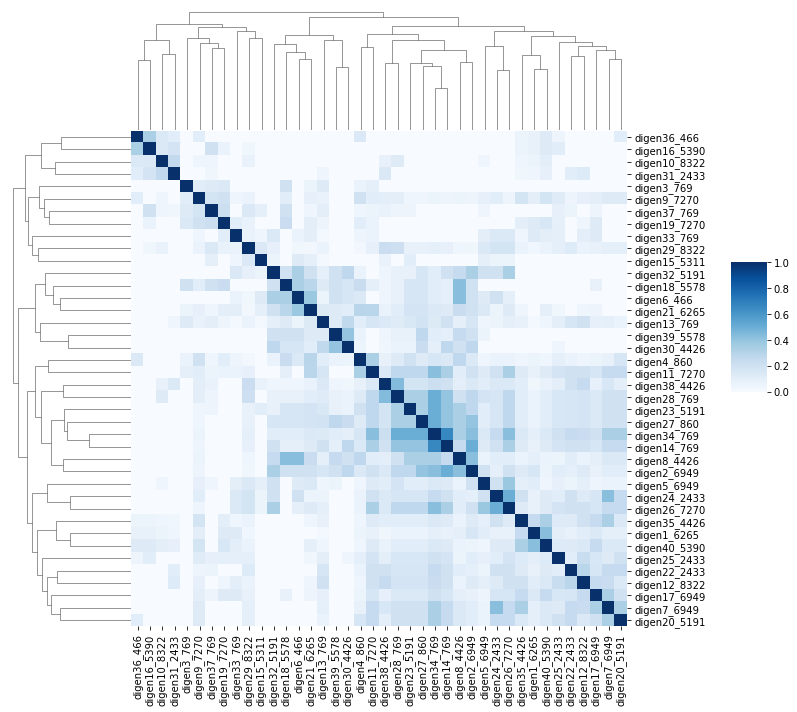

In [55]:
import matplotlib.pyplot as plt
g=sns.clustermap(dist, cmap="Blues")
col=g.cax.get_position()
g.cax.set_position([col.x0+1, col.y0-0.35, col.width, col.height])
plt.savefig('similarity_edges.eps', bbox_inches='tight')
#g.fig.suptitle('Jaccard\'s Similarity based on edges')
#g.ax_heatmap.set_title('IMLB50')
#g.fig.legend(loc='center left',bbox_to_anchor=(1,0.5))
#plt.savefig('digen_40_edges_similarity.eps', format='eps', bbox_inches='tight')
#plt.savefig('digen_40_edges_similarity.png', format='png', bbox_inches='tight')
#plt.savefig('digen_40_edges_similarity.svg', format='svg', bbox_inches='tight')

Inspecting internal parameters of each trial

In [15]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier

storage='sqlite:///et.db'
#print(str(optuna.study.get_all_study_summaries(storage=storage))
#load particular study
est=ExtraTreesClassifier()
loaded_study = optuna.load_study(study_name='digen5_6949'+'-' +  est.__class__.__name__ , storage=storage)

Load the best run throughout optimization

In [29]:
#Check optimal tuned parameters
print(loaded_study.best_params)
#Show AUROC score
print('Best AUROC: '+ str(loaded_study.best_value))
#Inspect additional settings
print(loaded_study.best_trial.user_attrs)
#check exact settings how the method was run
print(loaded_study.best_trial.user_attrs['params'])


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 77}
Best AUROC: 0.78
{'auroc': 0.78, 'estimator': 'ExtraTreesClassifier', 'fold0_auroc': 0.75, 'fold1_auroc': 0.7875, 'fold2_auroc': 0.7375, 'fold3_auroc': 0.7375, 'fold4_auroc': 0.825, 'fold5_auroc': 0.75, 'fold6_auroc': 0.8125, 'fold7_auroc': 0.7874999999999999, 'fold8_auroc': 0.8375, 'fold9_auroc': 0.7750000000000001, 'params': {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 77, 'n_jobs': None, 'oob_score': False, 'random_state': 6949, 'verbose': 0, 'warm_start': False}, 'seed': 6949, 'split_id': 9}
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': N

Check the parameters of the 18-th study 

In [30]:
loaded_study.get_trials()[18].params

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 96}

Look into user-defined attributes (e.g. scores for different folds)

In [31]:
loaded_study.get_trials()[18].user_attrs

{'auroc': 0.735,
 'estimator': 'ExtraTreesClassifier',
 'fold0_auroc': 0.7125,
 'fold1_auroc': 0.7375,
 'fold2_auroc': 0.75,
 'fold3_auroc': 0.7249999999999999,
 'fold4_auroc': 0.7125000000000001,
 'fold5_auroc': 0.7125,
 'fold6_auroc': 0.75,
 'fold7_auroc': 0.7250000000000001,
 'fold8_auroc': 0.7875,
 'fold9_auroc': 0.7375,
 'params': {'bootstrap': False,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 8,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 96,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 6949,
  'verbose': 0,
  'warm_start': False},
 'seed': 6949,
 'split_id': 9}

Find runtime of a given trial

In [32]:
duration=loaded_study.get_trials()[18].datetime_complete-loaded_study.get_trials()[18].datetime_start
duration.total_seconds()

1.666534

Inspect distributions of hyper-parameters

In [67]:
from digen import defaults
import inspect
print(inspect.getsource(defaults.params_XGBClassifier))

def params_XGBClassifier(trial):
    return {
            'booster' : trial.suggest_categorical(name='booster',choices=['gbtree', 'dart']),
            'n_estimators' : trial.suggest_int('n_estimators',10,100),
            'objective' : 'binary:logistic',
            'reg_lambda' : trial.suggest_loguniform('reg_lambda', 1e-5, 1e2),
            'alpha' : trial.suggest_loguniform('alpha',1e-5, 1e2),
            'gamma' : trial.suggest_discrete_uniform('gamma', 0, 0.5, 0.1),
            'eta' : trial.suggest_loguniform('eta', 1e-8, 1),
            'max_depth' : trial.suggest_int('max_depth',1,10),
            'eval_metric' : 'logloss',
            'tree_method' : 'exact',
            'nthread' : 1,
            'use_label_encoder' : False,
        }

